In [1]:
import matplotlib.pyplot as plt
import skimage as skm
import numpy as np
import cv2
from PIL import Image


from scipy import ndimage

(125, 307, 3)

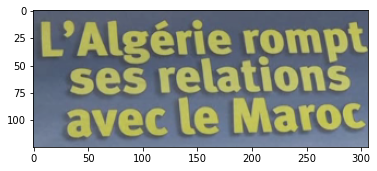

In [2]:
one=plt.imread('2.png')
plt.imshow(one)
one.shape

(125, 307)

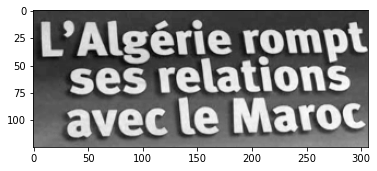

In [3]:
one1= skm.color.rgb2gray(one)
plt.imshow(one1 , cmap='gray')
one1.shape

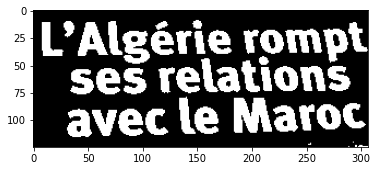

In [4]:
#filtre a utiliser Otsu : 
filt_im = one1 > skm.filters.threshold_otsu(one1)
plt.imshow(filt_im , cmap='gray')

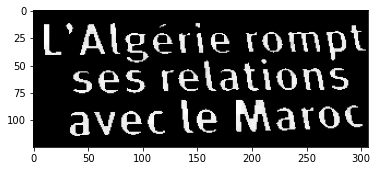

In [5]:
im = Image.fromarray(filt_im)
im.save("filt_im.jpeg")

img=cv2.imread("filt_im.jpeg")

#erosion
kernel = np.ones((4,4), np.uint8)
erim = cv2.erode(img , kernel, iterations = 1)
plt.imshow(erim, cmap='gray')

For the erosion we can use skimage but we don't have the hand on the dimension of the kernel so it's like something standard so it's not really interesting, the cv2 erosion is way better than skimage one for our application

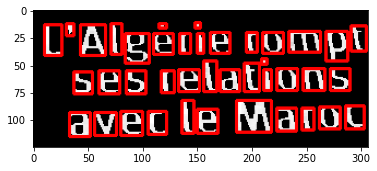

[5, 4, 28, 11, 28, 28, 23, 27, 19, 19, 18, 19, 18, 18, 19, 27, 5, 28, 26, 20, 20, 20, 19, 20, 20, 20, 21, 21, 20, 29, 30, 21, 20, 20, 21, 22, 21, 22, 21, 22]
[5, 7, 10, 7, 23, 16, 14, 20, 29, 19, 10, 18, 6, 10, 18, 22, 5, 12, 14, 18, 20, 19, 7, 18, 19, 12, 18, 19, 17, 32, 11, 17, 19, 11, 18, 19, 17, 20, 20, 19]


In [58]:
cont = cv2.cvtColor(erim, cv2.COLOR_BGR2GRAY)
(contours, heirarchy) = cv2.findContours(cont, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_char = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

img2 = erim.copy()

char_list=[]
hlist=[]
wlist=[]

for ctr in sorted_contours_char:
    
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    hlist.append(h)
    wlist.append(w)
    for char in sorted_contours_char:
            
        if cv2.contourArea(char) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(char)
        char_list.append([x, y, x+w, y+h])
        cv2.rectangle(img2, (x, y), (x+w, y+h), (255,0,0),2)
        
    
plt.imshow(img2);
plt.show()
print(hlist)
print(wlist)

In [54]:
for i, char in zip (range (10),sorted_contours_char) :
    x,y,w,h = cv2.boundingRect(sorted_contours_char[i])
    if (h > 15)&(w > 15) :    
        chartest=img[x:w+x , y:h+y]
        # plt.imshow(chartest)
        # plt.show()
        print ((x+w),(y+h))

66 41
26 41
288 46
263 38
229 39


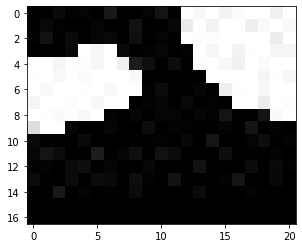

40
105 92 17 21


In [55]:
x,y,w,h = cv2.boundingRect(sorted_contours_char[36])
if (h > 12)&(w > 12) :    
    chartest=img[x:w+x , y : h+y]
    plt.imshow(chartest)
    plt.show()
    
print(len(sorted_contours_char))

print(x,y,w,h)

Just a note in case i need it one day : 
Le modèle de Chan-Vese pour les contours actifs est une approche solide et polyvalente pour segmenter un large éventail d’images, y compris certaines qui seraient difficiles à segmenter à l’aide de méthodes « traditionnelles » telles que le seuillage ou les méthodes basées sur le gradient. Ce modèle est couramment utilisé en imagerie médicale, en particulier pour la segmentation du cerveau, du cœur et de la trachée. Le modèle est basé sur un problème de minimisation de l’énergie qui peut être refondu dans une formulation d’ensemble de niveau pour rendre le problème plus facile à résoudre.